### Sentiment analysis (book description) NLP Natural Language Processing

In [2]:
#Database management
import pandas as pd
import numpy as np
import datetime
pd.set_option('display.max_columns', None)

#Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

#Nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from textblob import TextBlob

In [ ]:
#!pip install textblob


In [3]:
#Import data
best = pd.read_csv('Data/best_clean3.csv')

In [4]:
best.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34136 entries, 0 to 34135
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bookid          34136 non-null  object 
 1   title           34136 non-null  object 
 2   series          34136 non-null  int64  
 3   author          34136 non-null  object 
 4   rating          34136 non-null  float64
 5   description     34136 non-null  object 
 6   language        34136 non-null  object 
 7   isbn            34136 non-null  int64  
 8   characters      34136 non-null  object 
 9   bookformat      34136 non-null  object 
 10  edition         34136 non-null  object 
 11  pages           34136 non-null  int64  
 12  publisher       34136 non-null  object 
 13  publishdate     33715 non-null  object 
 14  awards          34136 non-null  int64  
 15  numratings      34136 non-null  float64
 16  likedpercent    34136 non-null  float64
 17  setting         34136 non-null 

In [ ]:
#Idea:
#With TextBlob and Nltk I can get the sentiment polarity of a description

#top 10 or less de generes
#top 5 books from each genre
#Sentiment Analysis from 'description' column

In [9]:
genres_df = best.explode('genre')

top_genres = genres_df['genre'].value_counts().head(10).index.tolist()
print("Top 10 Genres:", top_genres)

Top 10 Genres: ['Non-Fiction and Others', 'Classics', 'Literature by Region', 'Horror', 'Fantasy', 'Erotica', 'Fiction', 'Religion and Spirituality', 'Economy', 'Nature and Animals']


In [44]:
top_books = []

#select the top 10 books (based on rating o/ number of ratings)
for genre in top_genres:
    genre_books = best[best['genre'].apply(lambda x: genre in x)]
    top_10_books = genre_books.nlargest(10, 'rating')  # or 'numratings'
    top_books.append(top_10_books)

#concatenate the list of top books into a single dataframe
top_books_df = pd.concat(top_books)


In [45]:
top_books_df.shape

(100, 31)

In [46]:
#get the sentiment polarity of a description
def get_sentiment(description):
    return TextBlob(description).sentiment.polarity


top_books_df['sentiment'] = top_books_df['description'].apply(get_sentiment)
top_books_df.head()

,bookid,title,series,author,rating,description,language,isbn,characters,bookformat,edition,pages,publisher,publishdate,awards,numratings,likedpercent,setting,coverimg,bbescore,bbevotes,price,5_star,4_star,3_star,2_star,1_star,genre,price_sqrt,pages_log,numratings_log,sentiment
3400,17608096-obscured-darkness,Obscured Darkness (Family Secrets #2),0,Rebekah McClew (Goodreads Author),5.0,"In the second book of the series, fleeing for ...",English,9780983002284,[],Paperback,Unknown,292,Center One Publishing,2012-11-13,0,9.0,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,691,7,1136.0,9,0,0,0,0,Non-Fiction and Others,33.704599,5.680173,2.302585,0.044965
8585,42113688-the-arms-of-venus,The Arms of Venus,0,Terence Winstead (Goodreads Author),5.0,Some believe the arms of the Venus de Milo sta...,Unknown,9781727252460,[],Paperback,Unknown,506,CreateSpace Independent Publishing Platform,2018-09-10,0,5.0,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,199,2,436.0,5,0,0,0,0,Non-Fiction and Others,20.880613,6.228511,1.791759,0.000000
8587,43212281-matthias-and-the-shadow,Matthias and the Shadow,0,Michael Blythe,5.0,Matthias- a young man from the tribe of the be...,English,9781790986651,[],Paperback,1,28,createspace,2018-12-09,0,3.0,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,199,2,777.0,0,0,0,0,0,Non-Fiction and Others,27.874720,3.367296,1.386294,0.050000
8592,51983178-travel-in-time,Travel in Time: A Life Story in Poems,0,Anişoara Laura Musteţiu,5.0,Life experiences could be unique and inestimab...,Unknown,9798619636260,[],Paperback,Unknown,88,Independently Published,2020-02-29,0,6.0,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,199,2,1232.0,6,0,0,0,0,Non-Fiction and Others,35.099858,4.488636,1.945910,0.305245
13369,7091453-quiet-storm,Quiet Storm,0,Natasha Conn,5.0,"When the fabulous life of love, money, and car...",English,9780615317960,[],Paperback,Unknown,194,Labella Rose Publishing,2009-10-15,0,2.0,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,100,1,1554.0,0,0,0,0,0,Non-Fiction and Others,39.420807,5.273000,1.098612,0.193627


In [48]:
#let's grup by genre to get average sentiment scores:
#for each genre, the average sentiment score is calculated by averaging the sentiment polarity scores of all book 
#descriptions in that genre
genre_sentiment = top_books_df.groupby('genre')['sentiment'].mean().sort_values(ascending=False)

print("Average Sentiment Scores by Genre:")
print(genre_sentiment)

Average Sentiment Scores by Genre:
genre
Classics                     0.196238
Economy                      0.180035
Nature and Animals           0.166489
Erotica                      0.164060
Literature by Region         0.148586
Religion and Spirituality    0.118112
Horror                       0.114609
Non-Fiction and Others       0.087804
Fantasy                      0.081212
Name: sentiment, dtype: float64


#### -1 indicates a very negative sentiment.
#### 0 indicates a neutral sentiment.
#### 1 indicates a very positive sentiment.

The average sentiment scores by genre indicate how positive or negative the overall tone of the book descriptions is for each genre. 
- In this case, all genres have positive average sentiment scores, suggesting that, on average, the descriptions are generally positive across all genres. The degree of positivity varies, with "Classics" having the highest average sentiment and "Religion and Spirituality" being almost neutral.

In [49]:
#function to get the sentiment polarity of a description and translate it to a category
def get_sentiment_category(description):
    polarity = TextBlob(description).sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'


top_books_df['sentiment'] = top_books_df['description'].apply(get_sentiment_category)


#Summary 
genre_sentiment_summary = top_books_df.groupby('genre')['sentiment'].value_counts().unstack().fillna(0)
print("Sentiment Summary by Genre:")
print(genre_sentiment_summary)



Sentiment Summary by Genre:
sentiment                  negative  neutral  positive
genre                                                 
Classics                        0.0      5.0       5.0
Economy                         0.0      2.0       8.0
Erotica                         0.0      4.0       6.0
Fantasy                         1.0      6.0       3.0
Horror                          1.0      3.0       6.0
Literature by Region            0.0      5.0       5.0
Nature and Animals              0.0      5.0       5.0
Non-Fiction and Others          0.0     14.0       6.0
Religion and Spirituality       0.0      5.0       5.0


Overall, the sentiment summary shows that most book descriptions tend to be either neutral or positive across all genres, with very few or no negative descriptions in most genres. This distribution can help understand the general tone and audience reception of book descriptions in each genre.

In [ ]:
top_books_df.head()

I don't think this output is accurate, but also the descriptions of all books tend to be more positive than the bokk content itself. so let's do first a SIMPLE NLTK analysis

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Elsa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

what is Vader? 
- VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool, which is specifically designed for social media texts and works well with short texts such as book descriptions

In [51]:
#VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()


def get_sentiment(description):
    sentiment_scores = sid.polarity_scores(description)
    return sentiment_scores['compound']  

#apply to the 'description' column
top_books_df['sentiment'] = top_books_df['description'].apply(get_sentiment)


Compound score is a normalized score between -1 and 1

In [52]:

top_books_df.head()

,bookid,title,series,author,rating,description,language,isbn,characters,bookformat,edition,pages,publisher,publishdate,awards,numratings,likedpercent,setting,coverimg,bbescore,bbevotes,price,5_star,4_star,3_star,2_star,1_star,genre,price_sqrt,pages_log,numratings_log,sentiment
3400,17608096-obscured-darkness,Obscured Darkness (Family Secrets #2),0,Rebekah McClew (Goodreads Author),5.0,"In the second book of the series, fleeing for ...",English,9780983002284,[],Paperback,Unknown,292,Center One Publishing,2012-11-13,0,9.0,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,691,7,1136.0,9,0,0,0,0,Non-Fiction and Others,33.704599,5.680173,2.302585,-0.2302
8585,42113688-the-arms-of-venus,The Arms of Venus,0,Terence Winstead (Goodreads Author),5.0,Some believe the arms of the Venus de Milo sta...,Unknown,9781727252460,[],Paperback,Unknown,506,CreateSpace Independent Publishing Platform,2018-09-10,0,5.0,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,199,2,436.0,5,0,0,0,0,Non-Fiction and Others,20.880613,6.228511,1.791759,-0.3182
8587,43212281-matthias-and-the-shadow,Matthias and the Shadow,0,Michael Blythe,5.0,Matthias- a young man from the tribe of the be...,English,9781790986651,[],Paperback,1,28,createspace,2018-12-09,0,3.0,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,199,2,777.0,0,0,0,0,0,Non-Fiction and Others,27.874720,3.367296,1.386294,-0.6249
8592,51983178-travel-in-time,Travel in Time: A Life Story in Poems,0,Anişoara Laura Musteţiu,5.0,Life experiences could be unique and inestimab...,Unknown,9798619636260,[],Paperback,Unknown,88,Independently Published,2020-02-29,0,6.0,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,199,2,1232.0,6,0,0,0,0,Non-Fiction and Others,35.099858,4.488636,1.945910,0.9868
13369,7091453-quiet-storm,Quiet Storm,0,Natasha Conn,5.0,"When the fabulous life of love, money, and car...",English,9780615317960,[],Paperback,Unknown,194,Labella Rose Publishing,2009-10-15,0,2.0,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,100,1,1554.0,0,0,0,0,0,Non-Fiction and Others,39.420807,5.273000,1.098612,0.9371


In [53]:
genre_sentiment = top_books_df.groupby('genre')['sentiment'].mean().sort_values(ascending=False)

print("Average Sentiment Scores by Genre:")
print(genre_sentiment)

Average Sentiment Scores by Genre:
genre
Religion and Spirituality    0.61984
Economy                      0.45361
Nature and Animals           0.35123
Literature by Region         0.33826
Non-Fiction and Others       0.26601
Erotica                      0.08903
Fantasy                     -0.02810
Horror                      -0.03256
Classics                    -0.03304
Name: sentiment, dtype: float64


The sentiment scores from NLTK's VADER provide insights into the overall sentiment of book descriptions within each genre. Genres like "Religion and Spirituality" and "Economy" have notably positive sentiment, while genres like "Fantasy", "Horror", and "Classics" exhibit slightly negative sentiment. These scores help gauge the emotional tone and perception of the book descriptions in each genre, providing valuable insights for further analysis and interpretation.

UPDATING NLTK:
With tokenization and lemmatization that can help in cleaning and standardizing the text data. 
- Tokenization breaks down the text into individual words, and lemmatization reduces words to their base or root form, which helps in reducing the number of unique words and focusing on the essential terms.

In [25]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Elsa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Elsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Elsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [54]:
#tokenization and Lemmatization
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


In [55]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [56]:
#preprocessing descriptions
top_books_df['cleaned_description'] = top_books_df['description'].apply(preprocess_text)

#Combine all cleaned descriptions into a single string
all_cleaned_descriptions = ' '.join(top_books_df['cleaned_description'])

In [ ]:
top_books_df.head()

WORDCLOUD FOR EACH GENRE
For each genre, let's combine all cleaned descriptions into a single string and generate a word clouds, 
also assignig different color to each one.

In [34]:
# Genre to color map
genre_colors = {
    'Literature by Region': 'Greens',
    'Religion and Spirituality': 'Purples',
    'Nature and Animals': 'Blues',
    'Economy': 'Oranges',
    'Non-Fiction and Others': 'Greys',
    'Erotica': 'Reds',
    'Fantasy': 'pink',
    'Horror': 'inferno',
    'Classics': 'YlGnBu',
}


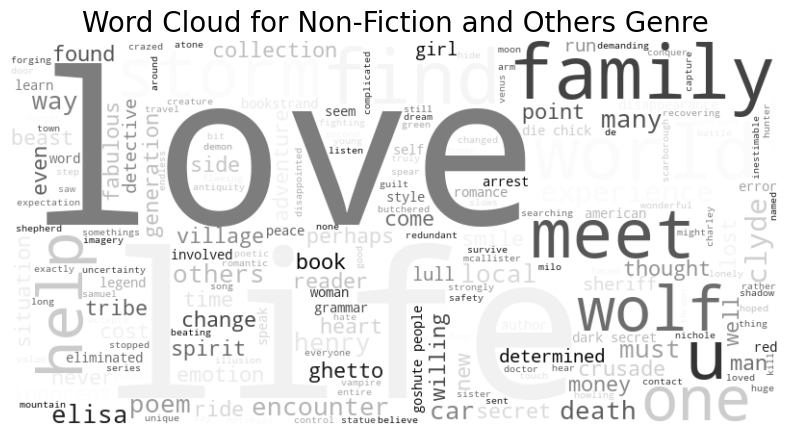

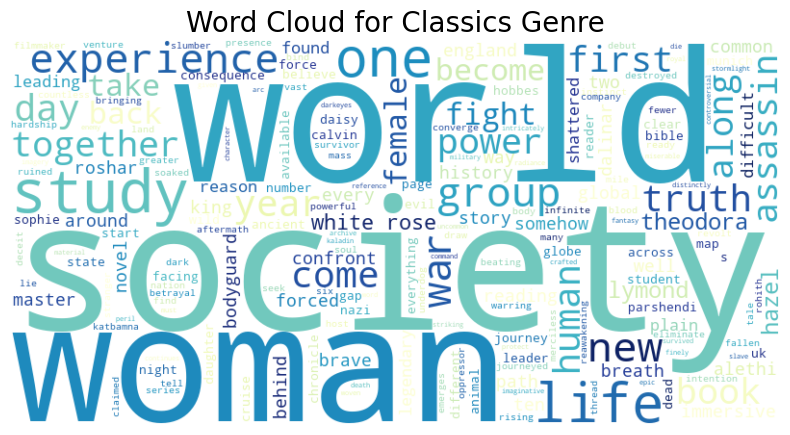

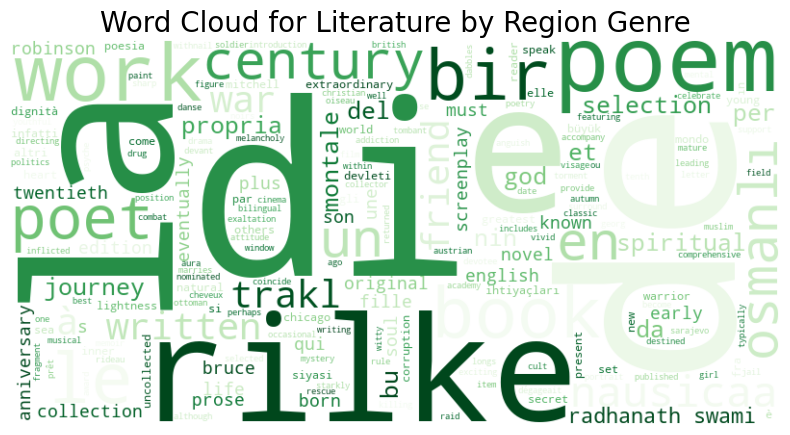

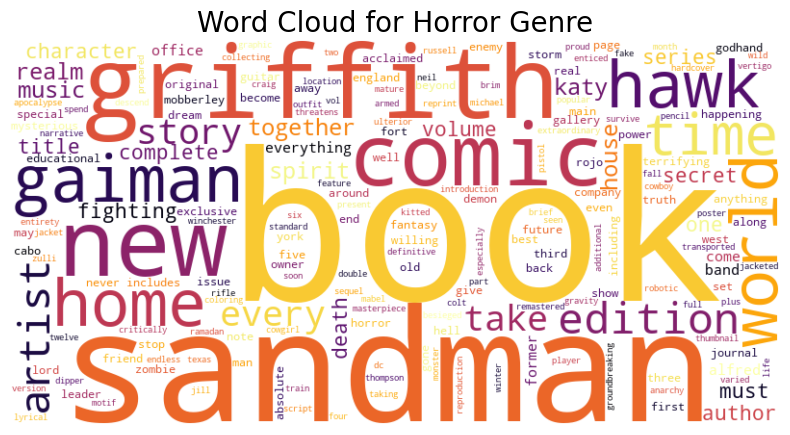

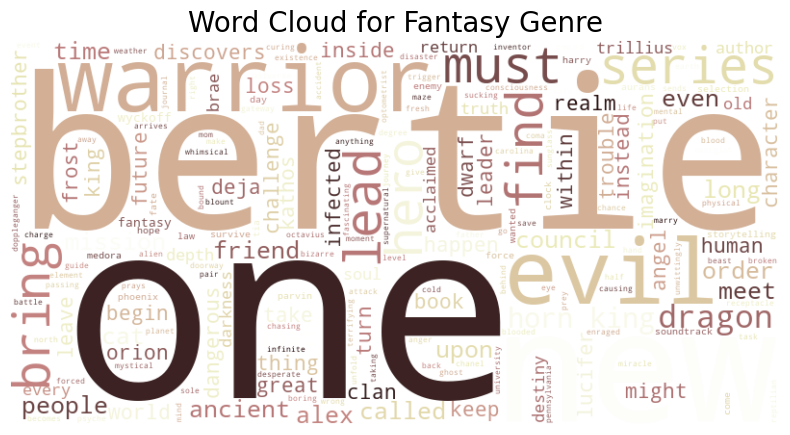

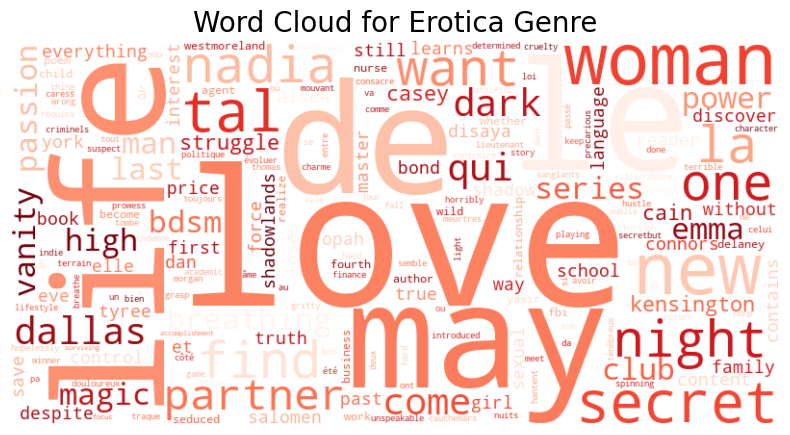

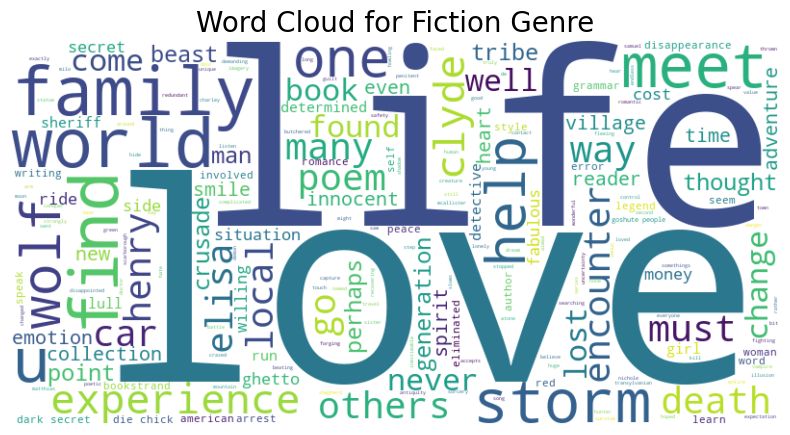

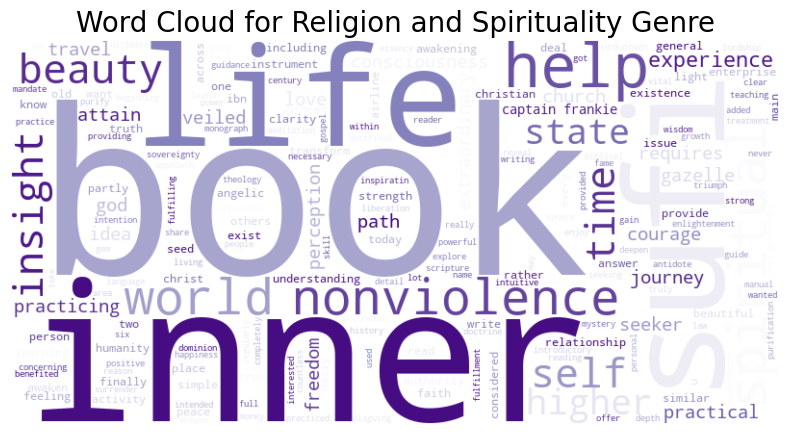

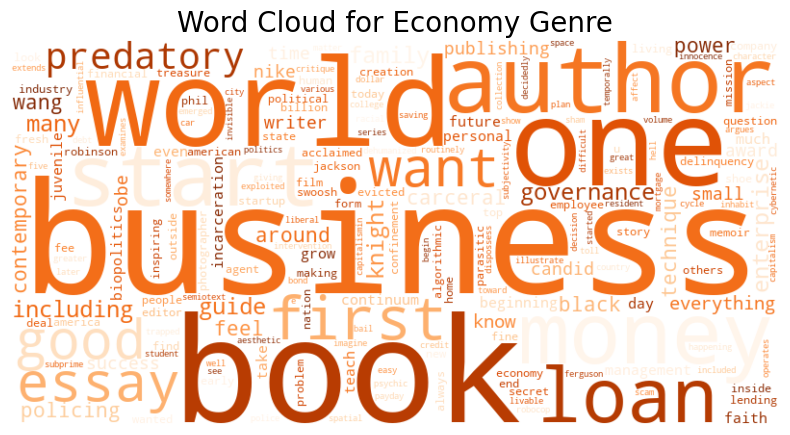

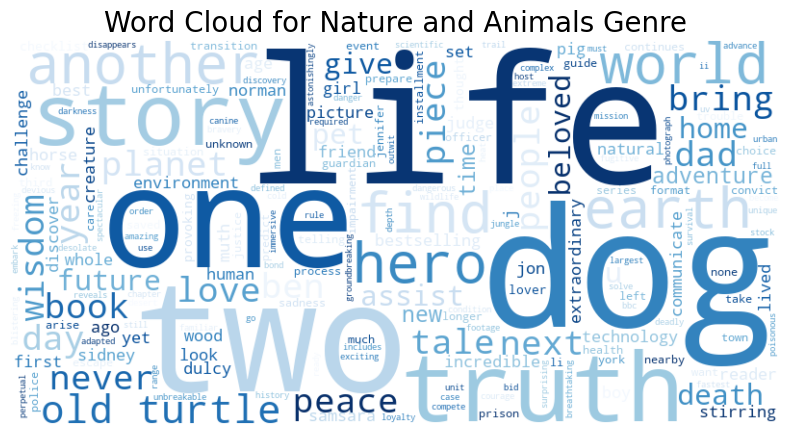

In [58]:
for genre in top_genres:
    genre_books = top_books_df[top_books_df['genre'].apply(lambda x: genre in x)]
    all_cleaned_descriptions = ' '.join(genre_books['cleaned_description'])
    
   
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=genre_colors.get(genre, 'viridis')).generate(all_cleaned_descriptions)
    
    
    plt.figure(figsize=(10, 5))
    plt.title(f"Word Cloud for {genre} Genre", fontsize=20)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [59]:
#Adding sentiment labels to de dataframe
def label_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

#apply
top_books_df['sentiment_label'] = top_books_df['sentiment'].apply(label_sentiment)

In [60]:
top_books_df.head()

,bookid,title,series,author,rating,description,language,isbn,characters,bookformat,edition,pages,publisher,publishdate,awards,numratings,likedpercent,setting,coverimg,bbescore,bbevotes,price,5_star,4_star,3_star,2_star,1_star,genre,price_sqrt,pages_log,numratings_log,sentiment,cleaned_description,sentiment_label
3400,17608096-obscured-darkness,Obscured Darkness (Family Secrets #2),0,Rebekah McClew (Goodreads Author),5.0,"In the second book of the series, fleeing for ...",English,9780983002284,[],Paperback,Unknown,292,Center One Publishing,2012-11-13,0,9.0,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,691,7,1136.0,9,0,0,0,0,Non-Fiction and Others,33.704599,5.680173,2.302585,-0.2302,second book series fleeing life nichole come c...,negative
8585,42113688-the-arms-of-venus,The Arms of Venus,0,Terence Winstead (Goodreads Author),5.0,Some believe the arms of the Venus de Milo sta...,Unknown,9781727252460,[],Paperback,Unknown,506,CreateSpace Independent Publishing Platform,2018-09-10,0,5.0,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,199,2,436.0,5,0,0,0,0,Non-Fiction and Others,20.880613,6.228511,1.791759,-0.3182,believe arm venus de milo statue lost antiquit...,negative
8587,43212281-matthias-and-the-shadow,Matthias and the Shadow,0,Michael Blythe,5.0,Matthias- a young man from the tribe of the be...,English,9781790986651,[],Paperback,1,28,createspace,2018-12-09,0,3.0,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,199,2,777.0,0,0,0,0,0,Non-Fiction and Others,27.874720,3.367296,1.386294,-0.6249,young man tribe bear sent crusade atone guilt ...,negative
8592,51983178-travel-in-time,Travel in Time: A Life Story in Poems,0,Anişoara Laura Musteţiu,5.0,Life experiences could be unique and inestimab...,Unknown,9798619636260,[],Paperback,Unknown,88,Independently Published,2020-02-29,0,6.0,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,199,2,1232.0,6,0,0,0,0,Non-Fiction and Others,35.099858,4.488636,1.945910,0.9868,life experience could unique inestimable exact...,positive
13369,7091453-quiet-storm,Quiet Storm,0,Natasha Conn,5.0,"When the fabulous life of love, money, and car...",English,9780615317960,[],Paperback,Unknown,194,Labella Rose Publishing,2009-10-15,0,2.0,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,100,1,1554.0,0,0,0,0,0,Non-Fiction and Others,39.420807,5.273000,1.098612,0.9371,fabulous life love money car meet dark secret ...,positive
